# T1.2

## Integrantes:

* Giulia Duncan Coutinho - 1410398
* Matheus Falcão - 1410962
* Igor Vieira - 1410492

# Parkinson Dataset

# **Matrix column entries (attributes):**

name - ASCII subject name and recording number

1. MDVP:Fo(Hz) - Average vocal fundamental frequency
2. MDVP:Fhi(Hz) - Maximum vocal fundamental frequency
3. MDVP:Flo(Hz) - Minimum vocal fundamental frequency
4. MDVP:Jitter(%),
5. MDVP:Jitter(Abs),
6. MDVP:RAP,
7. MDVP:PPQ,
8. Jitter:DDP

Several 
measures of variation in fundamental frequency
9. MDVP:Shimmer,
10. MDVP:Shimmer(dB),
11. Shimmer:APQ3,
12. Shimmer:APQ5,
13. MDVP:APQ,
14. Shimmer:DDA

Several measures of variation in amplitude

15. NHR,
16. HNR 

Two measures of ratio of noise to tonal components in the voice
17. status

Health status of the subject (one) - Parkinson's, (zero) - healthy
18. RPDE,             D2 - Two nonlinear dynamical complexity measures
19. DFA                Signal fractal scaling exponent
20. spread1,
21. spread2,
22. PPE                Three nonlinear measures of fundamental frequency variation 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from time import time
import random
import warnings
warnings.filterwarnings('ignore')

# Seed

In [2]:
seed = 1032
random.seed(seed)

# Plot configuration

In [3]:
%matplotlib inline 
plt.rc('font', family='Arial')
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12) 
plt.rc('font', size=12) 
plt.rc('figure', figsize = (12, 5))

# Pegando o dataset

In [4]:
dfParkinson = pd.read_csv('parkinson.csv')
print(dfParkinson.shape)
print(dfParkinson.columns)
dfParkinson.head()

(195, 24)
Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')


,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


# Entendendo os tipos dos dados
Os dados são em sua grande maioria números, oque facilita bastante

In [5]:
dfParkinson.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
name                195 non-null object
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
status              195 non-null int64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non-null floa

O que queremos é de fato saber se a pessoa tem ou não parkinson. Essa informação é dada pelo atributo 'status' onde:

0 -> não possui

1 -> possui

Sendo representado por tanto por healthy e Parkinson's respectivamente.
No caso o dataset possui 48 pessoas saudáveis e 147 pessoas com Parkinson, oque é não é muito bom pois está bastante discrepante a distribuição. O ideal seria que a quantidade de amostras tivessem mais proximidade

In [6]:
outcome_column = 'status'
# status: 0: healthy, 1: Parkinson's
outcome_labels = {0: 'Healthy', 1:'Parkinson`s'}
label_counts = np.bincount(dfParkinson.status)
x = range(len(outcome_labels))
y = list(label_counts)
print("Healthy quantity: ", y[0])
print("Parkinson`s quantity: ", y[1])

Healthy quantity:  48
Parkinson`s quantity:  147


# Plot quantidade de pessoas

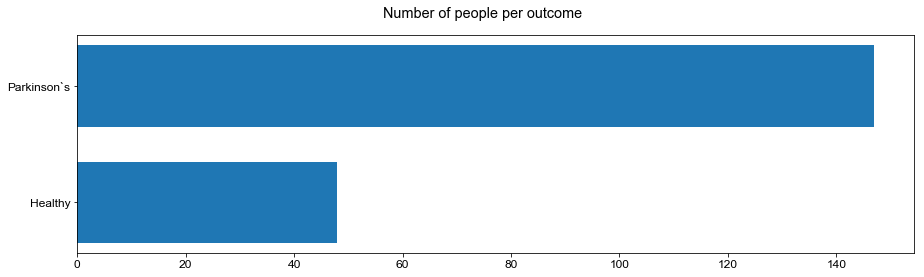

In [7]:
fig = plt.figure(figsize=(15,4))
plt.barh(x, y, height=0.7)
plt.yticks(x, outcome_labels.values())
fig.suptitle('Number of people per outcome')
plt.show()

Agora que já entendemos qual os tipos dos dados do dataset e tivemos uma visão geral sobre como está a distribuição dos dados em relação ao nosso objetivo, vamos definir quais os atributos serão utilizados para fazer a nossa predição.

Nesse caso, removeremos apenas os campos de texto 'status' e 'name', o resto são campos numéricos que serão utilizados.

In [8]:
features = [col for col in dfParkinson.columns if col not in ['name', 'status']]
features

['MDVP:Fo(Hz)',
 'MDVP:Fhi(Hz)',
 'MDVP:Flo(Hz)',
 'MDVP:Jitter(%)',
 'MDVP:Jitter(Abs)',
 'MDVP:RAP',
 'MDVP:PPQ',
 'Jitter:DDP',
 'MDVP:Shimmer',
 'MDVP:Shimmer(dB)',
 'Shimmer:APQ3',
 'Shimmer:APQ5',
 'MDVP:APQ',
 'Shimmer:DDA',
 'NHR',
 'HNR',
 'RPDE',
 'DFA',
 'spread1',
 'spread2',
 'D2',
 'PPE']

# Separando os dados entre modelo de teste e modelo de treino

Achei melhor colocar test_size = 0.15 pois nosso data set é muito pequeno e, fora isso, nossa distribuição entre pessoas com parkinson e sem parkinson é muito irregular, achei melhor não disperdiçar muitos dados para evitar o Overfitting

In [9]:
from sklearn.model_selection import train_test_split

# separando dados de treino e de teste (15% de teste)
dfTrain, dfTest = train_test_split(dfParkinson, test_size=0.15, 
                                   stratify=dfParkinson[outcome_column],random_state=seed)

# convertemos dataframe de features e labels em arrays
X_train = np.array(dfTrain[features])
Y_train = np.array(dfTrain[outcome_column])
print("Dados de treino: ", X_train.shape[0], Y_train.shape[0])

# convertemos dataframe de features e labels em arrays
X_test = np.array(dfTest[features])
Y_test = np.array(dfTest[outcome_column])

# Imprimimos as dimensões das massas de teste
print("Dados de teste: ", X_test.shape[0], Y_test.shape[0])

Dados de treino:  165 165
Dados de teste:  30 30


Treinando o modelo K-nearest neighbor com 2 vizinhos

In [10]:
from sklearn import neighbors
from sklearn import datasets
from sklearn import metrics

# Create an instance of K-nearest neighbor classifier
knn_model = neighbors.KNeighborsClassifier(n_neighbors=2)

# Train the classifier with the train data
knn_model.fit(X_train,Y_train)

# Compute the prediction over the test data set according to the model
Yhat = knn_model.predict(X_test)

In [11]:
accuracy_train = knn_model.score(X_train, Y_train)
print('Acuracia encontrada nos dados de treino:', '{:6.4f}'.format(accuracy_train))
accuracy_test = knn_model.score(X_test, Y_test)
print('Acuracia encontrada nos dados de teste:', '{:6.4f}'.format(accuracy_test))

Acuracia encontrada nos dados de treino: 0.9030
Acuracia encontrada nos dados de teste: 0.7667


# Bom, obtivemos esse resultado utilizando todas as features numericas com 2 vizinhos, e se variarmos as features, melhora ou piora?

Vamos remover as features de variacao de frequencia fundamental

In [12]:
features = [col for col in dfParkinson.columns if col not in ['name', 'status','MDVP:Shimmer',
 'MDVP:Shimmer(dB)',
 'Shimmer:APQ3',
 'Shimmer:APQ5',
 'MDVP:APQ',
 'Shimmer:DDA']]
features

['MDVP:Fo(Hz)',
 'MDVP:Fhi(Hz)',
 'MDVP:Flo(Hz)',
 'MDVP:Jitter(%)',
 'MDVP:Jitter(Abs)',
 'MDVP:RAP',
 'MDVP:PPQ',
 'Jitter:DDP',
 'NHR',
 'HNR',
 'RPDE',
 'DFA',
 'spread1',
 'spread2',
 'D2',
 'PPE']

In [13]:
dfParkinsonTrain, dfParkinsonTest = train_test_split(dfParkinson, test_size=0.15, stratify=dfParkinson[outcome_column],random_state=seed)

# convert feature dataframe and label series to arrays
X_train = np.array(dfParkinsonTrain[features])
Y_train = np.array(dfParkinsonTrain[outcome_column])
print("Dimensões de treino: ", X_train.shape[0], Y_train.shape[0])

# convert feature dataframe and label series to arrays
X_test = np.array(dfParkinsonTest[features])
Y_test = np.array(dfParkinsonTest[outcome_column])
print("Dimensões de teste: ", X_test.shape[0], Y_test.shape[0])

#Create an instance of K-nearest neighbor classifier
knn_model = neighbors.KNeighborsClassifier(n_neighbors=2)

#Train the classifier
knn_model.fit(X_train,Y_train)

#Compute the prediction according to the model
Yhat = knn_model.predict(X_test)

Dimensões de treino:  165 165
Dimensões de teste:  30 30


# Aparentemente, ao retirar essas features, o modelo responde pior para KNeighbors, oque faz sentido pois são menos dados a ser computados

0.8000 > 0.7667

In [14]:
accuracy_train = knn_model.score(X_train, Y_train)
print('Acuracia encontrada nos dados de treino:', '{:6.4f}'.format(accuracy_train))
accuracy_test = knn_model.score(X_test, Y_test)
print('Acuracia encontrada nos dados de teste:', '{:6.4f}'.format(accuracy_test))

Acuracia encontrada nos dados de treino: 0.9030
Acuracia encontrada nos dados de teste: 0.7667


# Adicionando vizinhos

In [15]:
dfParkinsonTrain, dfParkinsonTest = train_test_split(dfParkinson, test_size=0.15, stratify=dfParkinson[outcome_column],random_state=seed)

# convert feature dataframe and label series to arrays
X_train = np.array(dfParkinsonTrain[features])
Y_train = np.array(dfParkinsonTrain[outcome_column])
print("Dimensões de treino: ", X_train.shape[0], Y_train.shape[0])

# convert feature dataframe and label series to arrays
X_test = np.array(dfParkinsonTest[features])
Y_test = np.array(dfParkinsonTest[outcome_column])
print("Dimensões de teste: ", X_test.shape[0], Y_test.shape[0])

#Create an instance of K-nearest neighbor classifier
knn_model = neighbors.KNeighborsClassifier(n_neighbors=4)

#Train the classifier
knn_model.fit(X_train,Y_train)

#Compute the prediction according to the model
Yhat = knn_model.predict(X_test)

Dimensões de treino:  165 165
Dimensões de teste:  30 30


In [16]:
accuracy_train = knn_model.score(X_train, Y_train)
print('Acuracia encontrada nos dados de treino:', '{:6.4f}'.format(accuracy_train))
accuracy_test = knn_model.score(X_test, Y_test)
print('Acuracia encontrada nos dados de teste:', '{:6.4f}'.format(accuracy_test))

Acuracia encontrada nos dados de treino: 0.9030
Acuracia encontrada nos dados de teste: 0.9000


# Validation pipeline

In [17]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline

test_size = 0.2
n_folds = 3

def apply_validation_pipeline(name, model, params, X_train, y_train):
    pipe = Pipeline([('m', model)])
    grid = GridSearchCV(pipe, params, n_jobs=1, cv=n_folds)
    grid = grid.fit(X_train, y_train)

    print ("Model: "+ name)
    print ("Best cross-validation score: " + str(grid.best_score_))
    print ("Best parameters: " + str(grid.best_params_))
    return grid, grid.best_score_

def test_models(name, dataset_name, X_test, y_test, trained_model):
    predictions = trained_model.predict(X_test)
    print ("Model: "+ name)
    print ("Dataset: "+ dataset_name)
    test_accuracy = accuracy_score(y_test, predictions)
    print ("Accuracy score :" + str(test_accuracy))
    print (confusion_matrix(y_test, predictions))
    print (classification_report(y_test, predictions))
    return test_accuracy

# Agora vou configurar funcoes para executar varios algoritmos de uma forma mais generica, para assim varias features e parametros da cada algoritmo classificatorio
LinearSVC

KNN 

Decision Tree 

Gradient Boosting

Random Forest

Logistic Regression

SGD

In [18]:
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.neural_network import MLPClassifier

models_params = [
    ('LinearSVC', LinearSVC(random_state=seed), {'m__C': [0.1, 1, 10], 'm__dual': [True, False]}),
    ('KNN', KNeighborsClassifier(), {'m__n_neighbors': range(3,30)}),
    ('Decision Tree', DecisionTreeClassifier(random_state=seed), {'m__max_depth': range(3, 20)}),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=seed), {'m__n_estimators': [100, 200, 300]}),
    ('Random Forest', RandomForestClassifier(random_state=seed), { "m__n_estimators": [10, 30, 50, 70]}),
    ('Logistic Regression', LogisticRegression(), {}),
    ('SGD', SGDClassifier(random_state=seed), { 'm__alpha': (1e-2, 1e-3),
                                                'm__max_iter': (1000, 2000),
                                                'm__penalty': ('l2',),
                                               })
]

In [19]:
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA

# Don't cheat - fit only on training data
# apply same transformation to test data

# Standard Scaler

scaler = StandardScaler()
scaler.fit(X_train)  
X_train_scaled = scaler.transform(X_train) + 4 # prevent negative values
X_test_scaled = scaler.transform(X_test) + 4 # prevent negative values


# Normalizer

X_train_norm = normalize(X_train, axis=0)
X_test_norm = normalize(X_test, axis=0)


# Feature Selection - Variance Threshold after Normalizer 

sel = VarianceThreshold(threshold=0.0000005)
X_train_variance_threshold_10 = sel.fit_transform(X_train_norm)
X_test_variance_threshold_10 = sel.transform(X_test_norm)

sel = VarianceThreshold(threshold=0.000005)
X_train_variance_threshold_9 = sel.fit_transform(X_train_norm)
X_test_variance_threshold_9 = sel.transform(X_test_norm)


# PCA - Principal Component Analysis after Standard Scaler

pca8 = PCA(n_components=8)
X_train_pca8 = pca8.fit_transform(X_train_norm) + 4 # prevent negative values
X_test_pca8 = pca8.transform(X_test_norm) + 4 # prevent negative values

pca6 = PCA(n_components=6)
X_train_pca6 = pca6.fit_transform(X_train_norm) + 4 # prevent negative values
X_test_pca6 = pca6.transform(X_test_norm) + 4 # prevent negative values


datasets = [
    ('Default dataset', X_train, Y_train, X_test, Y_test),
    ('Standard Scaled dataset', X_train_scaled, Y_train, X_test_scaled, Y_test),
    ('Normalized dataset', X_train_norm, Y_train, X_test_norm, Y_test),
    ('Variance Threshold 10 features', X_train_variance_threshold_10, Y_train, X_test_variance_threshold_10, Y_test),
    ('Variance Threshold 9 features', X_train_variance_threshold_9, Y_train, X_test_variance_threshold_9, Y_test),
    ('PCA 8 components', X_train_pca8, Y_train, X_test_pca8, Y_train),
    ('PCA 6 components', X_train_pca6, Y_train, X_test_pca6, Y_train),
]

In [21]:
models_info = []

for dataset_name, X_train, Y_train, X_test, Y_test in datasets:
    print (dataset_name)
    for name, model, params in models_params:
        trained_model, val_accuracy = apply_validation_pipeline(name, model, params, X_train, Y_train)
        models_info.append({
            'name': name, 'dataset_name': dataset_name,
            'X_test': X_test, 'Y_test': Y_test,
            'trained_model': trained_model, 'validation_accuracy': val_accuracy
        })
    print ()

Default dataset
Model: LinearSVC
Best cross-validation score: 0.8484848484848485
Best parameters: {'m__C': 0.1, 'm__dual': False}
Model: KNN
Best cross-validation score: 0.8666666666666667
Best parameters: {'m__n_neighbors': 3}
Model: Decision Tree
Best cross-validation score: 0.8121212121212121
Best parameters: {'m__max_depth': 4}
Model: Gradient Boosting
Best cross-validation score: 0.8787878787878788
Best parameters: {'m__n_estimators': 100}
Model: Random Forest
Best cross-validation score: 0.8909090909090909
Best parameters: {'m__n_estimators': 50}
Model: Logistic Regression
Best cross-validation score: 0.8484848484848485
Best parameters: {}
Model: SGD
Best cross-validation score: 0.7818181818181819
Best parameters: {'m__alpha': 0.01, 'm__max_iter': 2000, 'm__penalty': 'l2'}

Standard Scaled dataset
Model: LinearSVC
Best cross-validation score: 0.8848484848484849
Best parameters: {'m__C': 10, 'm__dual': False}
Model: KNN
Best cross-validation score: 0.9090909090909091
Best paramete